In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install --upgrade tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import DepthwiseConv2D


class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):

        kwargs.pop('groups', None)
        super().__init__(*args, **kwargs)


model = tf.keras.models.load_model(
    '/content/drive/MyDrive/my_model_eff2.h5',
    custom_objects={'DepthwiseConv2D': CustomDepthwiseConv2D}
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


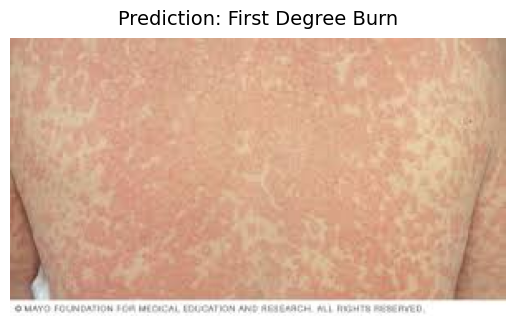

Image: img100.jpg
Prediction: First Degree Burn
----------------------------------------


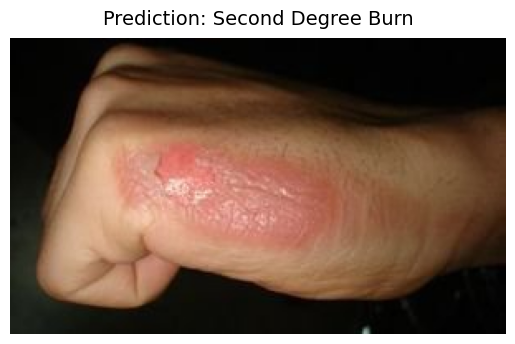

Image: img1031.jpg
Prediction: Second Degree Burn
----------------------------------------


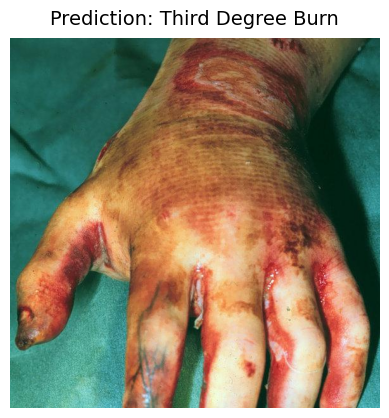

Image: 0372.jpg
Prediction: Third Degree Burn
----------------------------------------


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

# List of image paths
img_paths = [
    '/content/drive/MyDrive/1st degree burn/img100.jpg',
    '/content/drive/MyDrive/2nd degree burn/img1031.jpg',
    '/content/0372.jpg'
]

# Class names
class_names = ['First Degree Burn', 'Second Degree Burn', 'Third Degree Burn']

# Load and preprocess all images
images = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image
    img_array = image.img_to_array(img)  # Convert to numpy array
    images.append(img_array)

# Convert the list of images to a batch (4D numpy array)
images_batch = np.array(images)
images_batch = preprocess_input(images_batch)  # Preprocess the batch

# Make predictions using the model
predictions = model.predict(images_batch)

# Display results for each image
for i, img_path in enumerate(img_paths):
    # Get the predicted class
    predicted_class = np.argmax(predictions[i])  # Find the index of the highest confidence score

    # Display the image with the prediction
    plt.imshow(image.load_img(img_path))  # Load the original image for display
    plt.axis('off')  # Hide the axes
    plt.title(f"Prediction: {class_names[predicted_class]}", fontsize=14, pad=10)  # Add a title with the prediction
    plt.show()

    # Print the result
    print(f"Image: {img_path.split('/')[-1]}")  # Print the image file name
    print(f"Prediction: {class_names[predicted_class]}")  # Print the predicted class
    print("-" * 40)  # Separator for clarity

Saving _96565861_2017-06-20-photo-00000015.jpg to _96565861_2017-06-20-photo-00000015 (1).jpg
Saving 0056.jpg to 0056 (1).jpg
Saving 64e3cd642024e6f0eb1a6853_gr1 (1).jpg to 64e3cd642024e6f0eb1a6853_gr1 (1).jpg
Saving 0119.jpg to 0119 (2).jpg
Saving 0221.jpg to 0221 (1).jpg
Saving 0372.jpg to 0372 (2).jpg
Saving 642x361_Burns_Types_Treatments_Second_Degree_Dark_Skin.webp to 642x361_Burns_Types_Treatments_Second_Degree_Dark_Skin (1).webp
Saving 63879de3378925040a731b99_thord-degree-burn.webp to 63879de3378925040a731b99_thord-degree-burn (1).webp
Saving burns (1).jpg to burns (1) (1).jpg
Saving burns (11).jpg to burns (11) (1).jpg
Saving burns (16).jpg to burns (16) (1).jpg
Saving burns (21).jpg to burns (21) (1).jpg
Saving burns (23).jpg to burns (23) (1).jpg
Saving burns (24).jpg to burns (24) (1).jpg
Saving burns (29).jpg to burns (29) (1).jpg
Saving burns (31).jpg to burns (31) (1).jpg
Saving burns (34).jpg to burns (34) (1).jpg
Saving burns (35).jpg to burns (35) (1).jpg
1/1 ━━━━━━━━

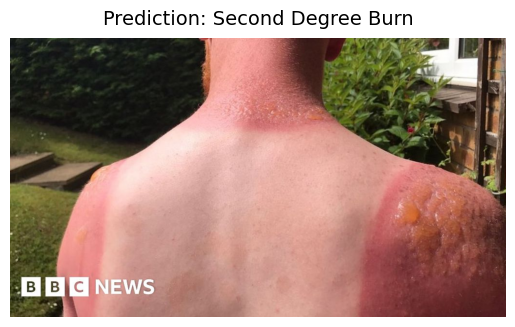

Image: _96565861_2017-06-20-photo-00000015 (1).jpg
Prediction: Second Degree Burn
----------------------------------------


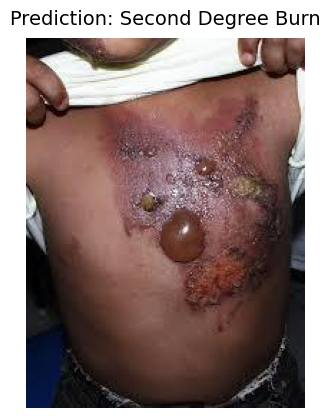

Image: 0056 (1).jpg
Prediction: Second Degree Burn
----------------------------------------


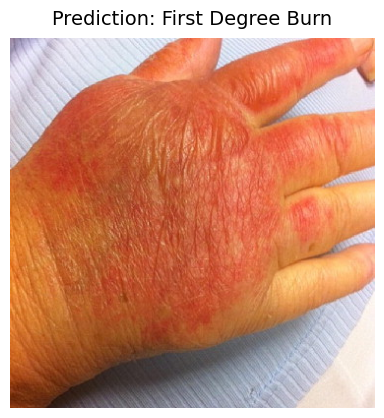

Image: 64e3cd642024e6f0eb1a6853_gr1 (1).jpg
Prediction: First Degree Burn
----------------------------------------


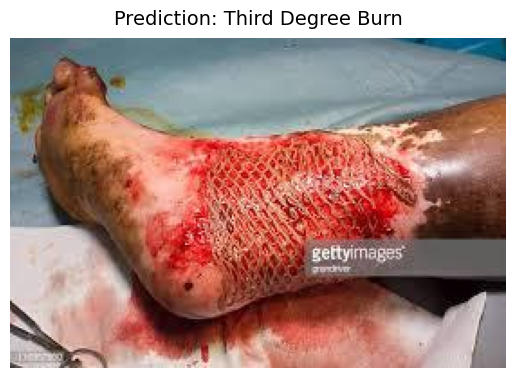

Image: 0119 (2).jpg
Prediction: Third Degree Burn
----------------------------------------


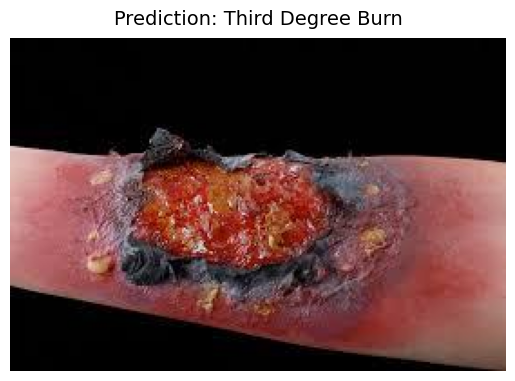

Image: 0221 (1).jpg
Prediction: Third Degree Burn
----------------------------------------


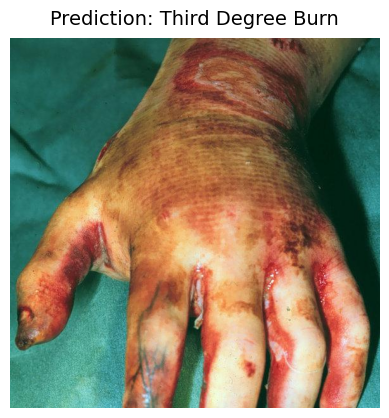

Image: 0372 (2).jpg
Prediction: Third Degree Burn
----------------------------------------


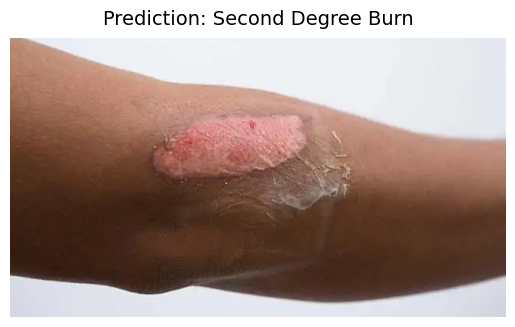

Image: 642x361_Burns_Types_Treatments_Second_Degree_Dark_Skin (1).webp
Prediction: Second Degree Burn
----------------------------------------


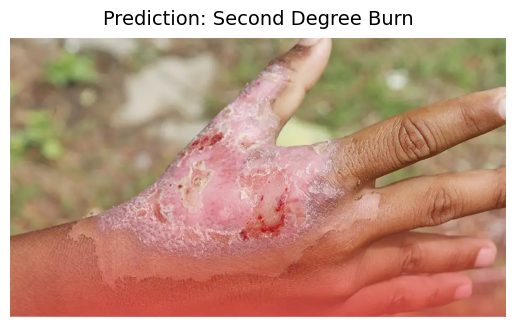

Image: 63879de3378925040a731b99_thord-degree-burn (1).webp
Prediction: Second Degree Burn
----------------------------------------


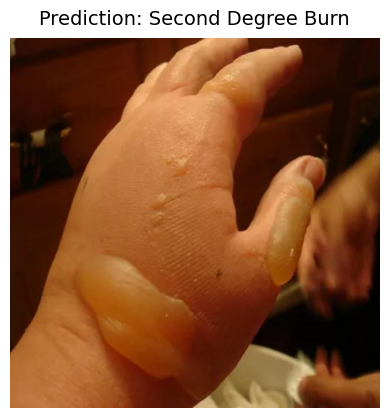

Image: burns (1) (1).jpg
Prediction: Second Degree Burn
----------------------------------------


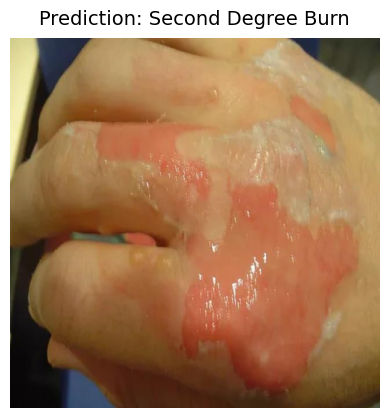

Image: burns (11) (1).jpg
Prediction: Second Degree Burn
----------------------------------------


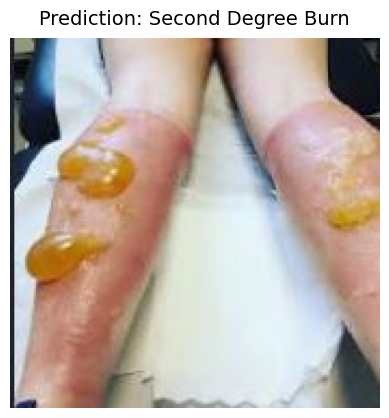

Image: burns (16) (1).jpg
Prediction: Second Degree Burn
----------------------------------------


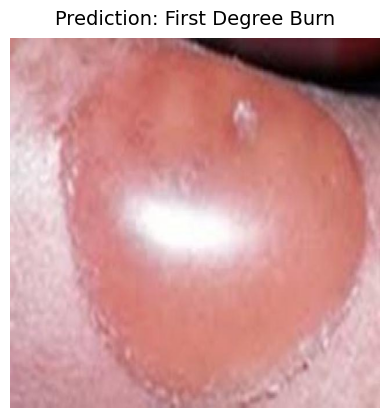

Image: burns (21) (1).jpg
Prediction: First Degree Burn
----------------------------------------


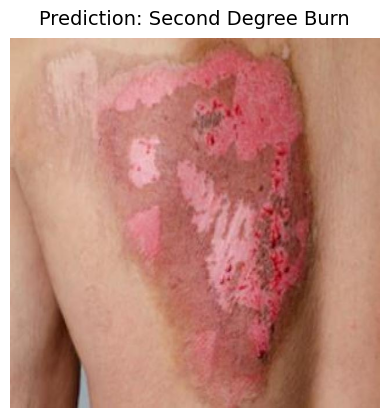

Image: burns (23) (1).jpg
Prediction: Second Degree Burn
----------------------------------------


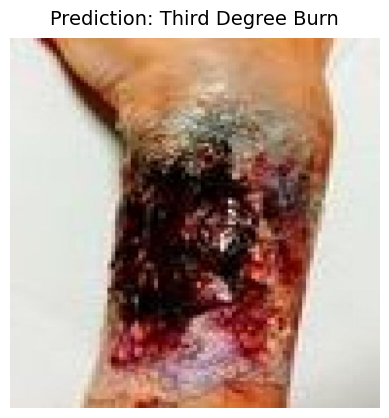

Image: burns (24) (1).jpg
Prediction: Third Degree Burn
----------------------------------------


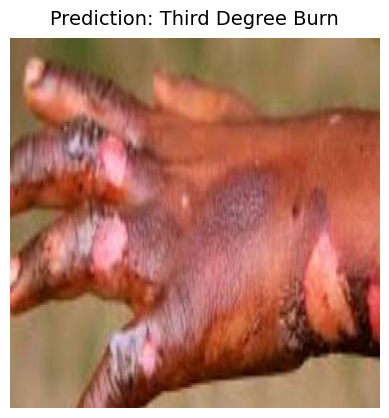

Image: burns (29) (1).jpg
Prediction: Third Degree Burn
----------------------------------------


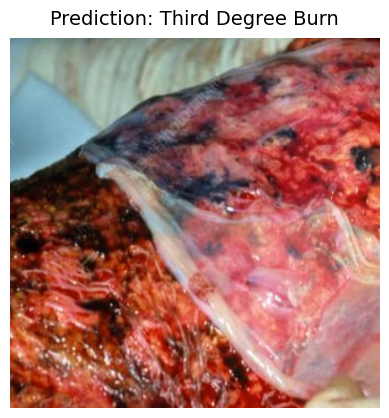

Image: burns (31) (1).jpg
Prediction: Third Degree Burn
----------------------------------------


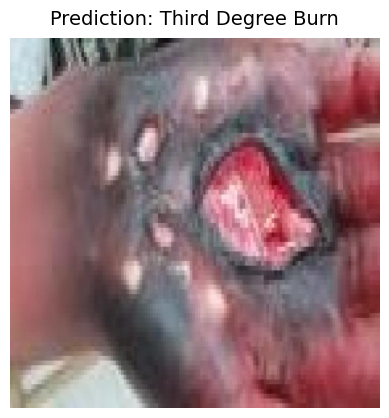

Image: burns (34) (1).jpg
Prediction: Third Degree Burn
----------------------------------------


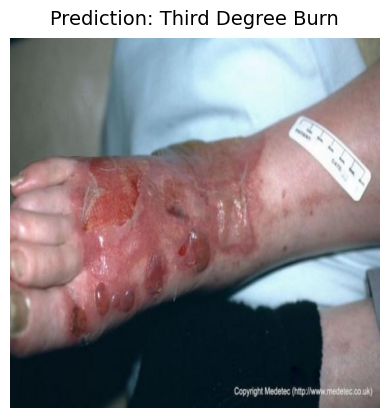

Image: burns (35) (1).jpg
Prediction: Third Degree Burn
----------------------------------------


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt
from google.colab import files

# Upload images from your local machine
uploaded = files.upload()

# Get the list of uploaded file paths
img_paths = list(uploaded.keys())

# Class names
class_names = ['First Degree Burn', 'Second Degree Burn', 'Third Degree Burn']

# Load and preprocess all images
images = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image
    img_array = image.img_to_array(img)  # Convert to numpy array
    images.append(img_array)

# Convert the list of images to a batch (4D numpy array)
images_batch = np.array(images)
images_batch = preprocess_input(images_batch)  # Preprocess the batch

# Make predictions using the model
predictions = model.predict(images_batch)

# Display results for each image
for i, img_path in enumerate(img_paths):
    # Get the predicted class
    predicted_class = np.argmax(predictions[i])  # Find the index of the highest confidence score

    # Display the image with the prediction
    plt.imshow(image.load_img(img_path))  # Load the original image for display
    plt.axis('off')  # Hide the axes
    plt.title(f"Prediction: {class_names[predicted_class]}", fontsize=14, pad=10)  # Add a title with the prediction
    plt.show()

    # Print the result
    print(f"Image: {img_path}")  # Print the image file name
    print(f"Prediction: {class_names[predicted_class]}")  # Print the predicted class
    print("-" * 40)  # Separator for clarity